<a href="https://colab.research.google.com/github/jibbsmathew/Car_Dataset_SVM_Classification/blob/main/Car_Dataset_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install matplotlib==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.0-cp310-cp310-linux_x86_64.whl size=12062878 sha256=d5584ca59aec6e6fd8760ec130195f40a1243d982a38a6e6b69b2b49e18eb1c3
  Stored in directory: /root/.cache/pip/wheels/fd/4d/10/e9efa74676a52fcc2f0a0247d72b9bdb09b4a5f5b4162c0173
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.0 which is incompatible.
mizani 0.8.1 requires matplotlib>=

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.svm import SVC
import sklearn.metrics as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import os, sys, itertools, re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy import mean
import sklearn.model_selection as models
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import timeit
from sklearn.utils.multiclass import unique_labels

ImportError: ignored

In [ ]:
if 'google.colab' in sys.modules:    
    project_path =  "/content/drive/My Drive/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

Mounted at /content/drive/
/content/drive/My Drive


In [ ]:
data = pd.read_csv('car_jm.csv')

In [ ]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
#to check how many null values are there in given columns
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
car         0
dtype: int64

In [ ]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,car
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


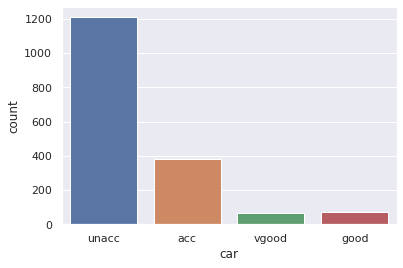

In [ ]:
import seaborn as sns
sns.countplot(data['car'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

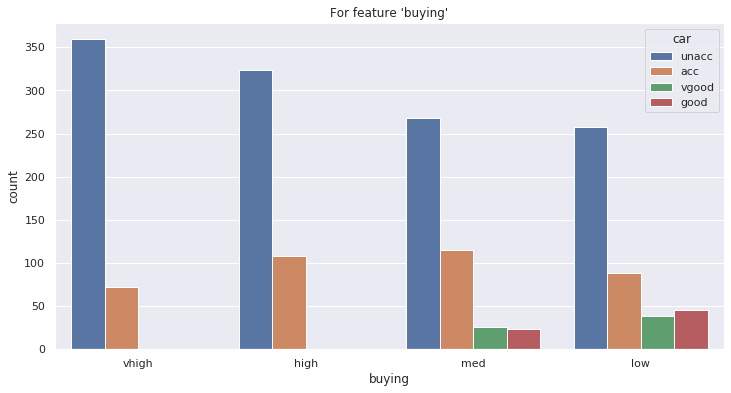

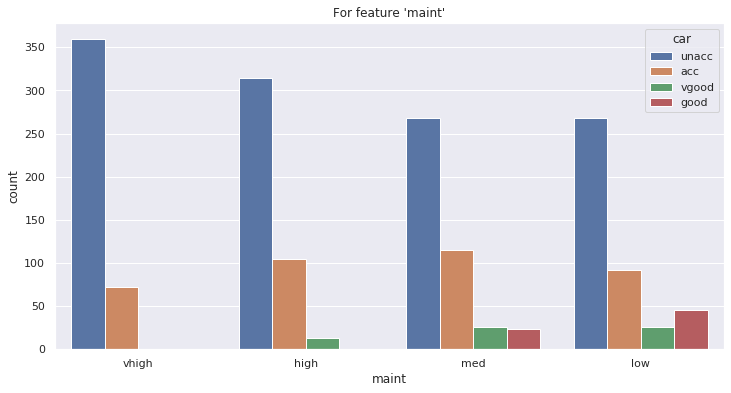

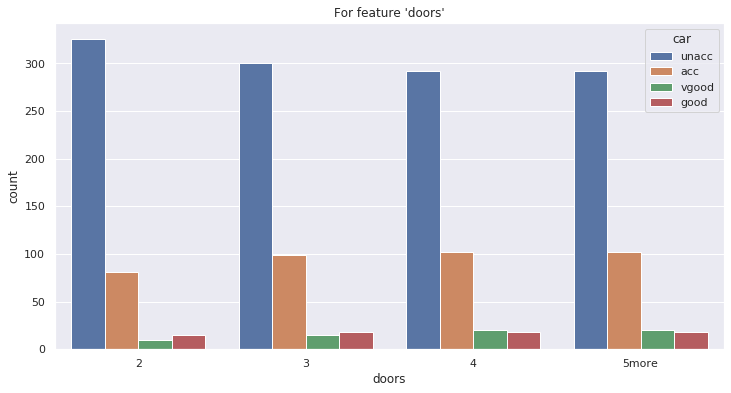

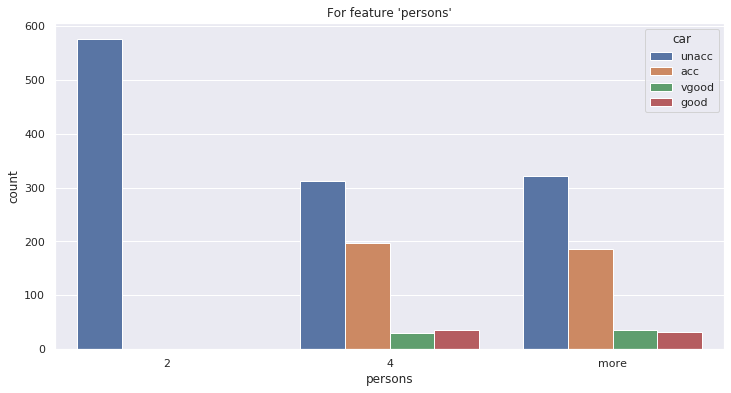

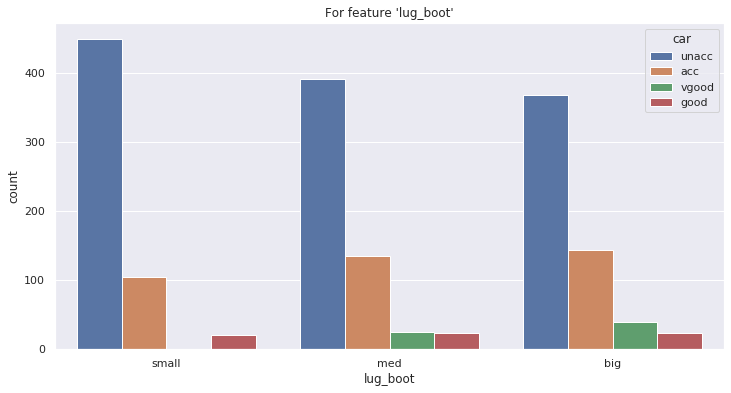

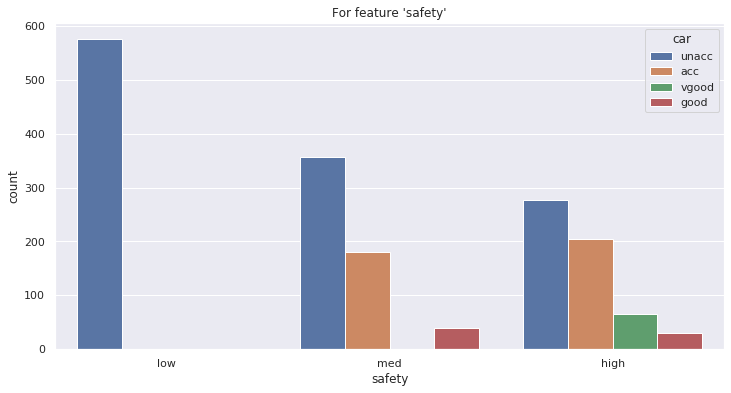

In [ ]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['car'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['buying'] = le.fit_transform(data.buying)
data['maint'] = le.fit_transform(data.maint)
data['doors'] = le.fit_transform(data.doors)
data['persons'] = le.fit_transform(data.persons)
data['lug_boot'] = le.fit_transform(data.lug_boot)
data['safety'] = le.fit_transform(data.safety)
data['car']=le.fit_transform(data.car)

In [ ]:
data=data[['buying','maint','doors','persons','lug_boot','safety','car']]

In [ ]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


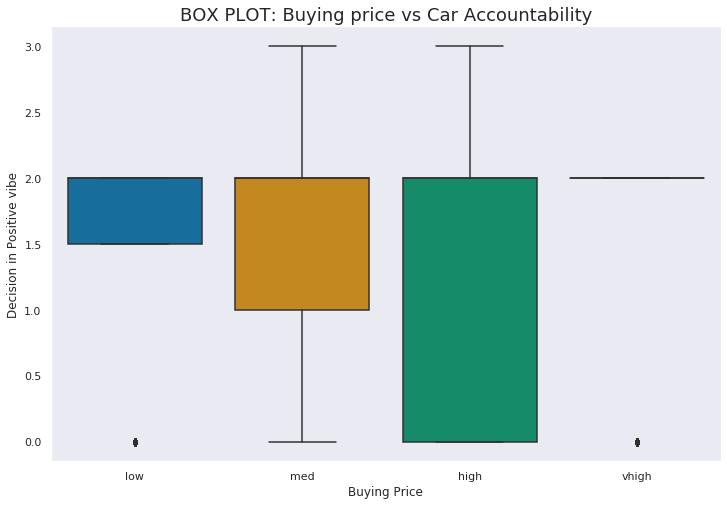

In [ ]:
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
plt.rcParams['figure.figsize'] = (12, 8)

ax = sns.boxplot(x = data['buying'], y = data['car'])
ax.set_title('BOX PLOT: Buying price vs Car Accountability', fontsize = 18)
ax.set_xlabel('Buying Price', fontsize = 12)
ax.set_ylabel('Decision in Positive vibe')
plt.xticks([0,1, 2, 3], ['low', 'med', 'high','vhigh'])
plt.show()

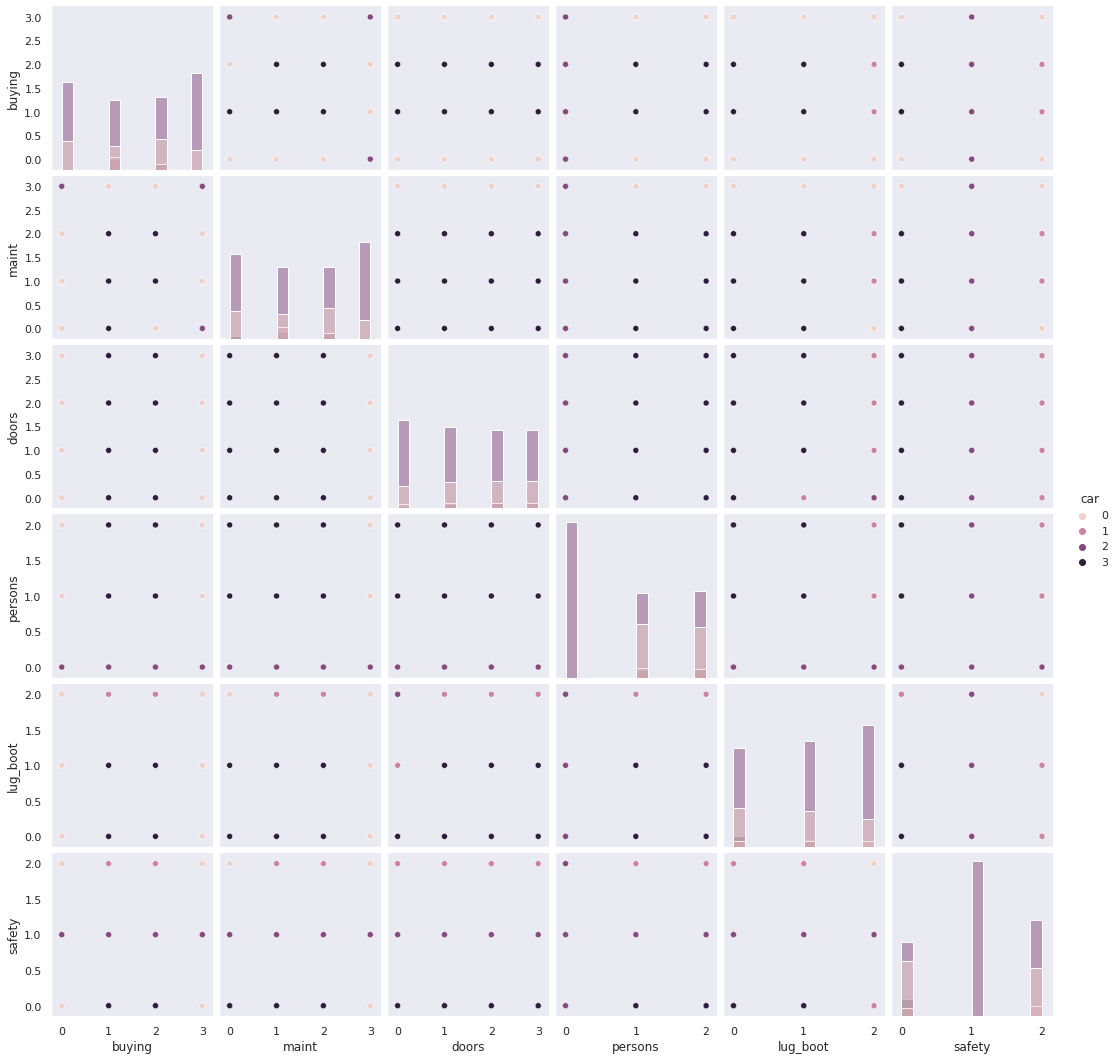

In [ ]:
sns.pairplot(data=data, hue='car', diag_kind='hist',kind='scatter')
plt.show()

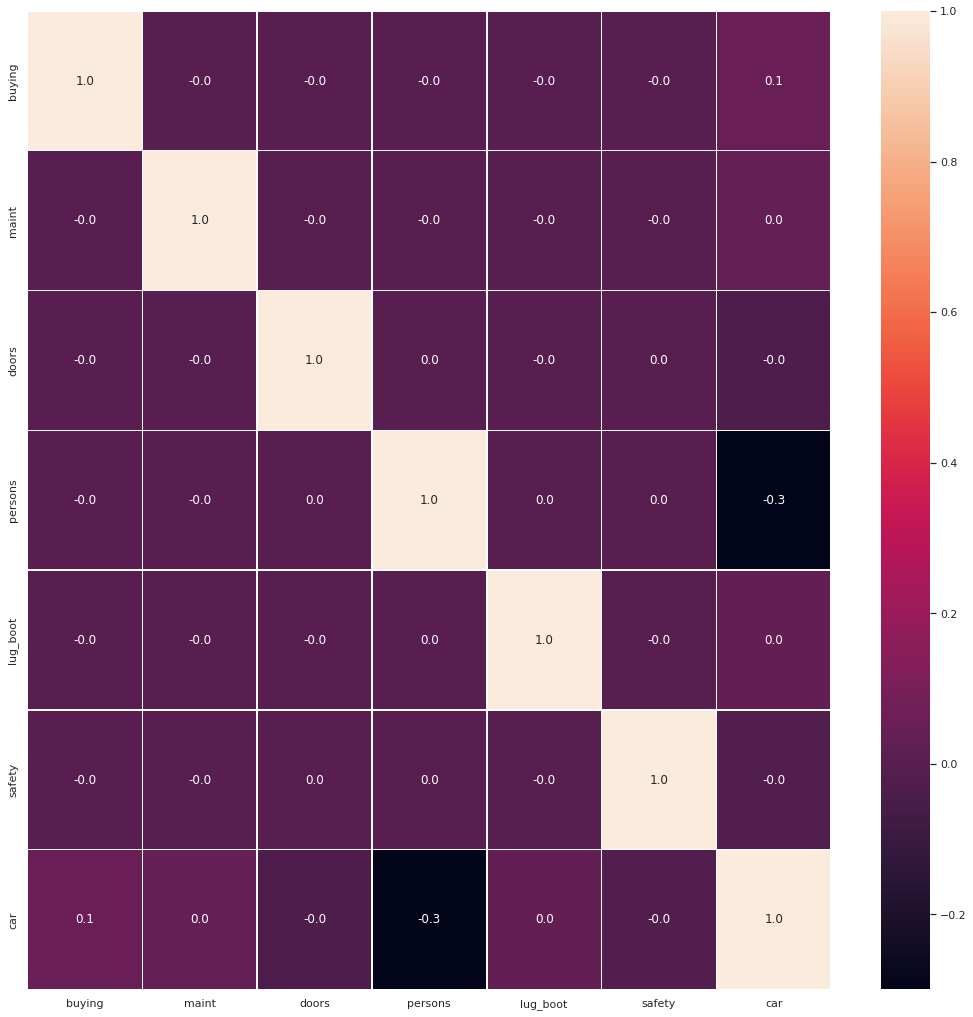

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [ ]:
#creating train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:,-1],test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = make_pipeline(StandardScaler(), SVC(gamma='auto'))
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
#Accuracy:
print('Model Performance(Test): %.2f' % pipeline.score(X_test, y_test))
print('Model Performance(Train): %.2f' % pipeline.score(X_train, y_train))

Model Performance(Test): 0.92
Model Performance(Train): 0.94


In [ ]:
from sklearn import metrics, preprocessing, svm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVC
pred_lr=pipeline.predict(X_test) 
print('MSE: ',metrics.mean_squared_error(y_test, pred_lr))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,pred_lr)))
#Evaluate the model using accuracy
lr_acc=metrics.r2_score(y_test,pred_lr)
print('Accuracy LR_pipeline: ',lr_acc)
mse_lr= mean_squared_error(y_test,pred_lr)
print(mse_lr)  

MSE:  0.3208092485549133
RMSE:  0.5664002547270908
Accuracy LR_pipeline:  0.5800465813040578
0.3208092485549133


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=5, n_jobs=1)

In [ ]:
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.89530686 0.89169675 0.87681159 0.91666667 0.91666667]


In [ ]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.899 +/- 0.015


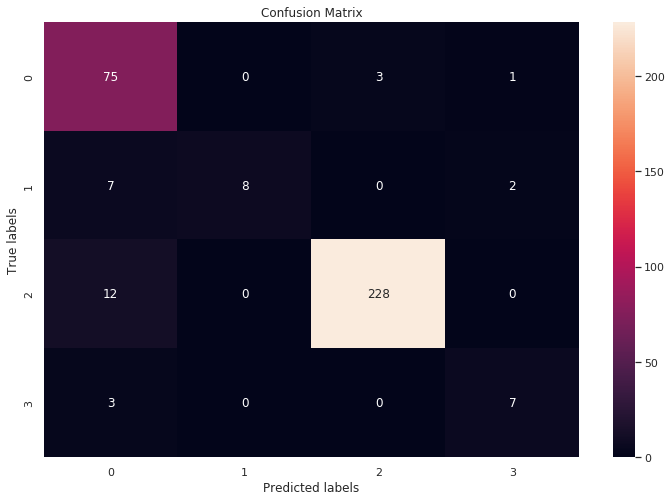

In [ ]:
import seaborn as sns
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix

T5_lables = ['0',"1","2","3"]    

ax= plt.subplot()

cnf_matrix = confusion_matrix(y_test,pred_lr)
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        79
           1       1.00      0.47      0.64        17
           2       0.99      0.95      0.97       240
           3       0.70      0.70      0.70        10

    accuracy                           0.92       346
   macro avg       0.87      0.77      0.79       346
weighted avg       0.93      0.92      0.92       346



In [ ]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity : ", TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity : ", TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision: ", PPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("False Positive Rate: ", FPR)
# False negative rate
FNR = FN/(TP+FN)
print("False Negative Rate: ", FNR)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy per class: ", ACC)

Sensitivity :  [0.94936709 0.47058824 0.95       0.7       ]
Specificity :  [0.917603   1.         0.97169811 0.99107143]
Precision:  [0.77319588 1.         0.98701299 0.7       ]
False Positive Rate:  [0.082397   0.         0.02830189 0.00892857]
False Negative Rate:  [0.05063291 0.52941176 0.05       0.3       ]
Accuracy per class:  [0.92485549 0.97398844 0.9566474  0.98265896]


In [ ]:
from sklearn.metrics import accuracy_score
lr = SVC(probability=True)
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test) 
accuracy_score(y_test,pred_lr)

y_prob_pred_cnb = lr.predict_proba(X_test)
from sklearn.metrics import roc_curve, roc_auc_score
#roc auc score
roc_auc_score(y_test, y_prob_pred_cnb, average='weighted',multi_class='ovo')

0.9884576912519113

In [ ]:
df_target=data[['car']].values
df_features=data.drop(columns=['car'],axis=1).values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 0)

In [ ]:
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

In [ ]:
#Linear SVM
print('Linear Model',end='\n')
lsvclassifier = SVC(kernel='linear')
lsvclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = lsvclassifier, X = x1_train, y = y1_train, cv = 5)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_linear*100,end='\n')
print('Standard deviation of Accuracies',std_svm_linear*100,end='\n')

#Predict SVM
y_predl = lsvclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
cm1=sk.confusion_matrix(y1_test,y_predl)
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

Linear Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

After 5 fold cross validation:
Mean of Accuracies:  73.36819724975138
Standard deviation of Accuracies 1.9609949279687973
Test Output:
Confusion Matrix:
[[ 13   0 102   0]
 [  1   0  24   0]
 [ 10   0 353   0]
 [ 10   0   6   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.11      0.17       115
           1       0.00      0.00      0.00        25
           2       0.73      0.97      0.83       363
           3       0.00      0.00      0.00        16

    accuracy                           0.71       519
   macro avg       0.28      0.27      0.25       519
weighted avg       0.59      0.71      0.62       519

Accuracy:  0.7052023121387283


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Polynomial SVM
print('Polynomial Model',end='\n')
psvclassifier = SVC(kernel='poly')
psvclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = psvclassifier, X = x1_train, y = y1_train, cv = 5)
mean_svm_poly=accuracies.mean()
std_svm_poly=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_poly*100,end='\n')
print('Standard deviation of Accuracies',std_svm_poly*100,end='\n')

#Predict SVM
y_predp = psvclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
cm2=sk.confusion_matrix(y1_test,y_predp)
print(sk.confusion_matrix(y1_test,y_predp))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predp))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predp, normalize=True, sample_weight=None))

Polynomial Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

After 5 fold cross validation:
Mean of Accuracies:  77.83443640478721
Standard deviation of Accuracies 1.604269664650329
Test Output:
Confusion Matrix:
[[ 47   0  68   0]
 [ 11   0  14   0]
 [ 21   0 342   0]
 [  6   0   7   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.41      0.47       115
           1       0.00      0.00      0.00        25
           2       0.79      0.94      0.86       363
           3       1.00      0.19      0.32        16

    accuracy                           0.76       519
   macro avg       0.59      0.38      0.41       519
weighted avg       0.71      0.76      0.72       519

Accuracy:  0.7552986512524085


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

In [ ]:
#RBF SVM
print('RBF Model',end='\n')
rsvclassifier = SVC(kernel='rbf')
rsvclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = rsvclassifier, X = x1_train, y = y1_train, cv = 5)
mean_svm_rbf=accuracies.mean()
std_svm_rbf=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_rbf*100,end='\n')
print('Standard deviation of Accuracies',std_svm_rbf*100,end='\n')

#Predict SVM
y_predr = rsvclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predr))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predr))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predr, normalize=True, sample_weight=None))

RBF Model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

After 5 fold cross validation:
Mean of Accuracies:  89.00072013991289
Standard deviation of Accuracies 1.1446628948225595
Test Output:
Confusion Matrix:
[[103   0  11   1]
 [ 23   0   0   2]
 [ 19   0 344   0]
 [  4   0   0  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       115
           1       0.00      0.00      0.00        25
           2       0.97      0.95      0.96       363
           3       0.80      0.75      0.77        16

    accuracy                           0.88       519
   macro avg       0.62      0.65      0.63       519
weighted avg       0.86      0.88      0.87       519

Accuracy:  0.884393063583815


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


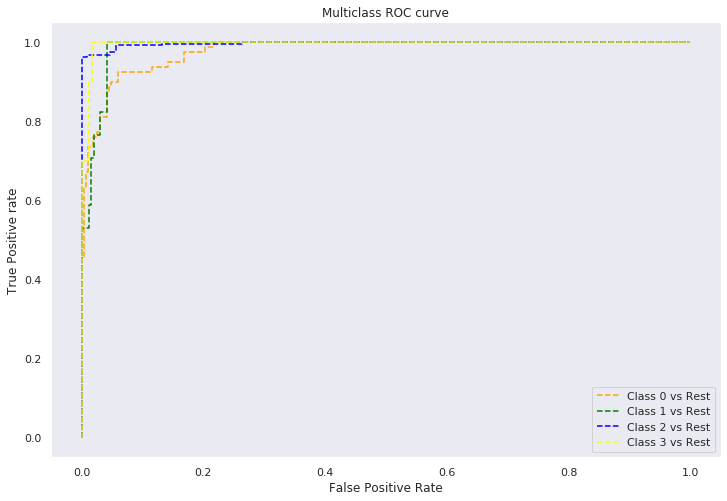

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [ ]:
#importing the K fold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, random_state=420,shuffle=True)
results_clf1 = cross_val_score(lr,X_train, y_train, cv=kfold)

accuracy_clf1=np.mean(abs(results_clf1))
print('Average accuracy: ',accuracy_clf1)
print('Standard Deviation: ',results_clf1.std())

Average accuracy:  0.8994140114058494
Standard Deviation:  0.009627712527586556
